## Project  - WeRateDogs

# Wrangling, Cleaning and Analyzing of Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessing</a></li>
<li><a href="#observe">Observations</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#store">Storing</a></li>
<li><a href="#visualize">Visualization</a></li>   
<li><a href="#ref">References</a></li>
</ul>


<a id='intro'></a>

## INTRODUCTION

### Project Details

- Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis, it consists of:
    - Gathering the data 
        1. From 'twitter-archive-enhanced.csv' file.
        2. From a [link]('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').
        3. From twitter API.
    - Assessing the data
    - Cleaning the data
- Storing, analyzing, and visualizing the wrangled data
- Reporting on: 
    1. Data wrangling efforts. 
    2. Data analyses and visualizations

<a id='gather'></a>
## GATHERING

In [525]:
# Importing all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import json
import requests
import os
import tweepy
# from twitter_api import get_twitter_data
import json
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from io import BytesIO
import warnings
import re
warnings.simplefilter(action="ignore", category=FutureWarning)

In [427]:
# Loading twitter archive file
twitter_arch = pd.read_csv("twitter-archive-enhanced.csv")

In [428]:
# Downloading image prediction file
folder_name = "data"
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
with open(os.path.join('data/' + url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [429]:
# Loading "image-prediction.csv" file
image_pred = pd.read_csv("data/image-predictions.tsv", sep="\t")

In [430]:
#Loading the tweets

In [431]:
with open("data/tweet-json.txt") as file:
    tweet_json = pd.read_json(file, lines=True, encoding="utf-8")

<a id='assess'></a>

## ASSESSING

### ASSESSMENT OF "twitter_archive.csv" 

#### VISUAL ASSESSMENT

In [432]:
# FIRST 5 ROWS
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [433]:
# CHECKING RANDOM ROWS/OBSERVATIONS
twitter_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1432,697482927769255936,NaN,NaN,2016-02-10 18:11:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Blipson. He's a Doowap Hufflepuff. That U...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697482927...,11,10,Blipson,None,None,None,None
1334,705428427625635840,NaN,NaN,2016-03-03 16:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705428427...,11,10,Ambrose,None,None,pupper,None
994,748568946752774144,NaN,NaN,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cora. She rings a bell for treats. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748568946...,12,10,Cora,None,None,None,None
1746,679132435750195208,NaN,NaN,2015-12-22 02:52:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a river dancer. His friend...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679132435...,10,10,Louis,None,None,None,None
2316,666649482315059201,NaN,NaN,2015-11-17 16:09:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Cool dog. Enjoys couch. Low monotone bark. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666649482...,4,10,None,None,None,None,None
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,None,None,floofer,None,None
2168,669354382627049472,NaN,NaN,2015-11-25 03:18:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dug. Dug fucken loves peaches. 8/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669354382...,8,10,Dug,None,None,None,None
556,803638050916102144,NaN,NaN,2016-11-29 16:33:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pupper hath acquire enemy. 13/10 https://t.co/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/803638050...,13,10,None,None,None,pupper,None
1757,678764513869611008,NaN,NaN,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo


#### PROGRAMMATIC ASSESSMENT

In [434]:
# Details of all the columns
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

--- Some columns are having missing values and wrong data types

In [435]:
# Summary statistics of the numerator ratings and denominator ratings
twitter_arch[["rating_numerator", "rating_denominator"]].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


--- The rating numerator is greater than 10, and it should not be

In [436]:
# Checking for unique dog names
twitter_arch["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

"a", "all", "his" can not be dog names

In [437]:
# Counting each unique name
twitter_arch["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

### ASSESSMENT OF "image_pred" 

#### VISUAL ASSESSMENT

In [438]:
# FIRST 5 ROWS
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [439]:
# CHECKING RANDOM ROWS/OBSERVATIONS
image_pred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
1197,740676976021798912,https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,1,wombat,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,0.043559,False
1187,739485634323156992,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
368,672968025906282496,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
836,694206574471057408,https://pbs.twimg.com/media/CaJRMPQWIAA1zL9.jpg,1,Shih-Tzu,0.352547,True,toy_poodle,0.155720,True,Maltese_dog,0.116657,True
1108,723688335806480385,https://pbs.twimg.com/media/CgsOszGW0AAruKp.jpg,2,teddy,0.263256,False,chow,0.089010,True,Irish_terrier,0.065306,True


--- What role is img_num playing in the dataset. p1, p2, p3 seems to play the same role

#### PROGRAMMATIC ASSESSMENT

In [440]:
# Details of all the columns
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


--- No column is empty or null

In [441]:
# Checking the number of unique values in img_num
image_pred["img_num"].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

--- Values range from 1 to 4

--- The rating numerator is greater than 10, and it should not be

In [442]:
# Checking for unique dog names
image_pred["p1"].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

--- Most names in p1, p2, p3 start with small letters

### ASSESSMENT OF "twitter_archive.csv" 

#### VISUAL ASSESSMENT

In [443]:
# FIRST 5 ROWS
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [444]:
# CHECKING RANDOM ROWS/OBSERVATIONS
tweet_json.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
504,2016-12-24 22:04:54+00:00,812781120811126785,812781120811126784,This is Swagger. He's the Cleveland Browns amb...,False,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 812781114158743552, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,8380,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
711,2016-10-07 16:33:21+00:00,784431430411685888,784431430411685888,This is Stormy. He's curly af. Already pupared...,False,"[0, 77]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 784431410685902849, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6329,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
349,2017-02-14 17:17:22+00:00,831552930092285952,831552930092285952,This is Dutch. He dressed up as his favorite e...,False,"[0, 117]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831552915512901632, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9872,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
490,2016-12-27 17:36:16+00:00,813800681631023104,813800681631023104,This is Sky. She's learning how to roll her R'...,False,"[0, 66]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 813800671384391680, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,9300,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1579,2016-01-13 04:10:18+00:00,687124485711986689,687124485711986688,Say hello to Samson. He's a Firecracker Häagen...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687124481781927936, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2371,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1959,2015-12-06 04:34:25+00:00,673359818736984064,673359818736984064,This is Steve. He was just relaxing in hot tub...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673359812403531776, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1558,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
223,2017-04-04 19:03:06+00:00,849336543269576704,849336543269576704,At first I thought this was a dog because of t...,False,"[0, 136]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 849336535245877248, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12240,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1200,2016-04-03 01:36:11+00:00,716439118184652801,716439118184652800,This is Bluebert. He just saw that both #Final...,False,"[0, 117]","{'hashtags': [{'text': 'FinalFur', 'indices': ...","{'media': [{'id': 716439112555823104, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2574,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1162,2016-04-21 16:00:57+00:00,723179728551723008,723179728551723008,This is Jangle. She's addicted to broccoli. It...,False,"[0, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 723179713569521664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,5761,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2199,2015-11-23 04:21:26+00:00,668645506898350081,668645506898350080,Incredibly rare dog here. Good at bipedalism. ...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668645502213357568, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,962,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


--- Different id column name from the data set ab-initio

#### PROGRAMMATIC ASSESSMENT

In [445]:
# Details of all the columns
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

--- Not all columns are relevant. Many missing values 

In [446]:
# Checking the number of unique values in img_num
tweet_json["lang"].value_counts()

en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: lang, dtype: int64

--- English Language is the most used language in the data

<a id='observe'></a>

## OBSERVATIONS

After the VISUAL and PROGRAMMIC ASSESSMENTS of the datasets as shown above, the following observations were made:

### QUALITY ISSUES
        * twitter-archive
            1. timestamp column is an object(i.e string) instead of datetime format. 

            2. In several columns null objects are represented as 'None' instead of NaN. 

            3. Dog Name column have invalid names i.e 'None', 'such', 'the 'a', 'an' etc. 

            4. Some rows have several identical values in the expanded_url column. 

            5. These columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,                                       retweeted_status_user_id and tweet_id) is float instead of string (to prevent operations happening on                  them).

        ** image_pred.tsv
            1. Tweet_id fields in the three datasets are stored as int values and should be strings. 

            2. Missing values from images dataset (2075 rows instead of 2356). (This was resolved at the end of the                  data wrangling)

            3. Some tweet_ids have the same jpg_url.
        
        *** twitter_json
            1. Create_date column is an object instead of datetime. 
  

### TIDINESS ISSUES

        * twitter-archive.csv
            1. Dog stages (doggo, floofer, pupper, puppo) are spread in different columns. 

            2. We are only interested in “original tweets”, no “retweets”; the retweet data is in columns like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. 

            3. Reply tweets are not “original tweets” either; this data is stored in the columns in_reply_to_status_id and in_reply_to_user_id. 

        ** image-pred.tsv
            1. Breed Predictions, Confidence intervals and Dog tests are spread in three columns. 

        *** twitter_json
            1. Create_date exists already in twitter-archive-enhanced.tsv. 

            2. All columns can be merged into 1 using tweet_id. 

<a id='clean'></a>
## Cleaning Data
In this section, we will clean **all** of the issues we realized while assessing. 


In [447]:
# Make copies of original pieces of data
twitter_arch_clean = twitter_arch.copy()
image_pred_clean = image_pred.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1: timestamp column in twitter dataframe is object instead of datetime format.

#### Define: Convert timestamp column from object datatype to datetime using to_datetime 

#### Code

In [448]:
twitter_arch_clean['timestamp']= pd.to_datetime(twitter_arch_clean['timestamp'])
twitter_arch_clean['retweeted_status_timestamp']= pd.to_datetime(twitter_arch_clean['retweeted_status_timestamp'])

#### Test

In [449]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: In several columns null objects are represented as 'None' instead of NaN

#### Define: Change values represented in twitter dataframe columns name, doggo, floofer, pupper, puppo as None to NaN

#### Code

In [450]:
twitter_arch_clean['name'].replace('None', np.NAN, inplace =True)
twitter_arch_clean['doggo'].replace('None', np.NAN, inplace =True)
twitter_arch_clean['floofer'].replace('None', np.NAN, inplace =True)
twitter_arch_clean['pupper'].replace('None', np.NAN, inplace =True)
twitter_arch_clean['puppo'].replace('None', np.NAN, inplace =True)

#### Test

In [451]:
twitter_arch_clean['name'].value_counts()
twitter_arch_clean['doggo'].value_counts()
twitter_arch_clean['floofer'].value_counts()
twitter_arch_clean['pupper'].value_counts()
twitter_arch_clean['puppo'].value_counts()

puppo    30
Name: puppo, dtype: int64

### Issue #3: Dog Name column have invalid names i.e 'None', 'such', 'the 'a', 'an' etc

#### Define: Write a for loop to asess the text column for the missing name of the dog and create a new name column to replace the old name column. Change names with words like 'a', 'an', 'such' to NAN values

#### Code

In [452]:
# Looping through the texts to check for the dog name as earlier noticed during assessment. 
#using some sentences that were found to come before the name in the text and check if it matches any of the  conditions
# creating an empty list to append the result to
names = []

for text in twitter_arch_clean['text']:
    # Start with 'This is ' and the first letter of the name is usually uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        names.append(text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the first letter of the name is usually uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        names.append(text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the first letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'His name is ' and the first letter of the name is uppercase
    elif text.startswith('His name is ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'Here we have ' and the first letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        names.append(text.split()[3].strip(',').strip('.'))
    # or Contains 'named' and the first letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        names.append('NaN')

# Test
len(names)

# Save result in a new column 'names'
twitter_arch_clean['names'] = names


In [453]:
# using a for loop to iterate through the new name column for nan and using the existing name in the old name column to fill it
a = twitter_arch_clean['name']
b = twitter_arch_clean['names']
index = a.index
Names=b.values
x=len(b)
for i in range(0, x):
    if Names[i] == 'NaN':
        Names[i] = a[i]


In [454]:
#drop old column name 
twitter_arch_clean = twitter_arch_clean.drop('name', 1)


In [455]:
#replacing dog names like 'such', 'a' and 'an' with NAN
twitter_arch_clean['names'].replace('such', np.NAN, inplace =True)
twitter_arch_clean['names'].replace('a', np.NAN, inplace =True)
twitter_arch_clean['names'].replace('an', np.NAN, inplace =True)
twitter_arch_clean['names'].replace('the', np.NAN, inplace =True)
twitter_arch_clean['names'].replace('None', np.NAN, inplace =True)

#### Test

In [456]:
twitter_arch_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,names
2111,670442337873600512,NaN,NaN,2015-11-28 03:21:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Koda. He's large. Looks very soft. Great ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/670442337...,11,10,NaN,NaN,NaN,NaN,Koda
1500,692158366030913536,NaN,NaN,2016-01-27 01:33:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Edgar. He's a Sassafras Puggleflash. N...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/692158366...,10,10,NaN,NaN,NaN,NaN,Edgar
1836,676098748976615425,NaN,NaN,2015-12-13 17:57:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Extremely rare pup here. Very religious. Alway...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/676098748...,3,10,NaN,NaN,NaN,NaN,NaN
702,786036967502913536,NaN,NaN,2016-10-12 02:53:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Scout. He really wants ...,7.798343e+17,4.196984e+09,2016-09-25 00:06:08+00:00,https://twitter.com/dog_rates/status/779834332...,11,10,NaN,NaN,NaN,NaN,Scout
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667902449...,9,10,NaN,NaN,NaN,NaN,Cleopatricia


In [457]:
#checking the new name column value
twitter_arch_clean['names'].value_counts()

Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
              ..
Zoe            1
Stewie         1
Lilah          1
Spanky         1
Christoper     1
Name: names, Length: 975, dtype: int64

In [458]:
#checking names with null value
sum(twitter_arch_clean.names.isna())

789

### Issue #4: Some rows have several identical values in the expanded_url column

#### Define: Remove duplicated values 

#### Code

In [459]:
twitter_arch_clean.drop_duplicates(subset= 'expanded_urls', inplace = True)

#### Test

In [460]:
sum(twitter_arch_clean.expanded_urls.duplicated())

0

### Issue #5: these columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) are floats instead of strings

#### Define: Change datatype of these columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string

#### Code

In [461]:
twitter_arch_clean['tweet_id'] = twitter_arch_clean['tweet_id'].astype(object)
twitter_arch_clean['in_reply_to_status_id'] = twitter_arch_clean['in_reply_to_status_id'].astype(object)
twitter_arch_clean['in_reply_to_user_id'] = twitter_arch_clean['in_reply_to_user_id'].astype(object)
twitter_arch_clean['retweeted_status_id'] = twitter_arch_clean['retweeted_status_id'].astype(object)
twitter_arch_clean['retweeted_status_user_id'] = twitter_arch_clean['retweeted_status_user_id'].astype(object)

#### Test

In [462]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2219 non-null   object             
 1   in_reply_to_status_id       24 non-null     object             
 2   in_reply_to_user_id         24 non-null     object             
 3   timestamp                   2219 non-null   datetime64[ns, UTC]
 4   source                      2219 non-null   object             
 5   text                        2219 non-null   object             
 6   retweeted_status_id         180 non-null    object             
 7   retweeted_status_user_id    180 non-null    object             
 8   retweeted_status_timestamp  180 non-null    datetime64[ns, UTC]
 9   expanded_urls               2218 non-null   object             
 10  rating_numerator            2219 non-null   int64           

### Issue #6: Tweet_id fields in the three datasets are stored as numeric values and should be strings.

#### Define: Convert tweet_id from int to string data type

#### Code

In [463]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [464]:
# Renaming the id to tweet_id 
tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [465]:
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(object)
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(object)

#### Test

In [466]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #7: Some tweet_ids have the same jpg_url in the image prediction data

#### Define: Drop duplicated jpg_urls

#### Code

In [467]:
image_pred_clean.drop_duplicates(subset= 'jpg_url', inplace = True)

#### Test

In [468]:
sum(image_pred_clean.jpg_url.duplicated())

0

### Issue #8: Create_date is object instead of datetime

#### Define: Convert create_date column to datetime

#### Code

In [469]:
tweet_json_clean.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [470]:
# Renaming "created_at" to "create_date"
tweet_json_clean.rename(columns = {'created_at':'create_date'}, inplace = True)

In [471]:
tweet_json_clean['create_date'] = pd.to_datetime(tweet_json_clean['create_date'])

In [472]:
tweet_json_clean.head()

,create_date,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [473]:
# Selecting columns from tweet_json
tweet_json_clean = tweet_json_clean[["tweet_id", "create_date", "retweet_count", "favorite_count", "create_date"]]

#### Test

In [474]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2354 non-null   object             
 1   create_date     2354 non-null   datetime64[ns, UTC]
 2   retweet_count   2354 non-null   int64              
 3   favorite_count  2354 non-null   int64              
 4   create_date     2354 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(2), object(1)
memory usage: 92.1+ KB


### Issue #9: Dog stages (doggo, floofer, pupper, puppo) are spread in different columns.

#### Define: Melt the four dog columns(doggo, floofer, pupper and puppo) into a column called dog_stages and change datatype to category

#### Code

In [475]:
print(twitter_arch_clean.doggo.value_counts())
print(twitter_arch_clean.floofer.value_counts())
print(twitter_arch_clean.pupper.value_counts())
print(twitter_arch_clean.puppo.value_counts())

doggo    90
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    244
Name: pupper, dtype: int64
puppo    26
Name: puppo, dtype: int64


In [476]:
#melting the columns
twitter_arch_clean = pd.melt(twitter_arch_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source','text','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator','names'],
                         value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], var_name='dog_stages', value_name='stage')
twitter_arch_clean = twitter_arch_clean.drop('dog_stages', axis=1)
print(twitter_arch_clean.stage.value_counts())
#Filter for unique values then remove duplicate values based on 'dog_stage' values
twitter_arch_clean = twitter_arch_clean.sort_values('stage').drop_duplicates('tweet_id', keep = 'first')
print(twitter_arch_clean.stage.value_counts())

pupper     244
doggo       90
puppo       26
floofer     10
Name: stage, dtype: int64
pupper     232
doggo       90
puppo       25
floofer      9
Name: stage, dtype: int64


In [477]:
#changing the new column to category datatype
twitter_arch_clean['stage']= twitter_arch_clean['stage'].astype('category')

#### Test

In [478]:
twitter_arch_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,names,stage
59,880465832366813184,NaN,NaN,2017-06-29 16:39:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/880465832...,12,10,Bella,NaN
6008,681891461017812993,NaN,NaN,2015-12-29 17:36:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/681891461...,10,10,Charlie,pupper
925,747439450712596480,NaN,NaN,2016-06-27 14:40:26+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Linus. He just wanted to say hello but...,NaN,NaN,NaT,https://vine.co/v/5uTVXWvn3Ip,12,10,Linus,NaN
492,805520635690676224,NaN,NaN,2016-12-04 21:14:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke the Wonder Dog. He never let that...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/805520635...,13,10,Zeke,NaN
1008,735991953473572864,NaN,NaN,2016-05-27 00:32:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's curly af. Also rather f...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/735991953...,11,10,Maxaroni,NaN


In [479]:
twitter_arch_clean.stage.value_counts()

pupper     232
doggo       90
puppo       25
floofer      9
Name: stage, dtype: int64

### Issue #10: retweet data is in columns like retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Define: drop rows with retweets and columns retweeted_status_id, retweeted_status_user and retweeted_status_timestamp 

#### Code

In [480]:
#keeping rows without retweets
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.retweeted_status_id.isnull()]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.retweeted_status_user_id.isnull()]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.retweeted_status_timestamp.isnull()]

In [481]:
#dropping the columns containing retweets 
twitter_arch_clean.drop(twitter_arch_clean.iloc[:, 6:9], inplace= True, axis=1)

#### Test

In [482]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2039 entries, 9 to 2218
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2039 non-null   object             
 1   in_reply_to_status_id  24 non-null     object             
 2   in_reply_to_user_id    24 non-null     object             
 3   timestamp              2039 non-null   datetime64[ns, UTC]
 4   source                 2039 non-null   object             
 5   text                   2039 non-null   object             
 6   expanded_urls          2038 non-null   object             
 7   rating_numerator       2039 non-null   int64              
 8   rating_denominator     2039 non-null   int64              
 9   names                  1390 non-null   object             
 10  stage                  320 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object

### Issue #11: Reply tweets are not “original tweets” either; this data is stored in the columns in_reply_to_status_id and in_reply_to_user_id.

#### Define: drop columns containing reply tweets

#### Code

In [483]:
#keeping rows without replies
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.in_reply_to_status_id.isnull()]
twitter_arch_clean = twitter_arch_clean[twitter_arch_clean.in_reply_to_user_id.isnull()]

In [484]:
#dropping the columns containing replies to tweet
twitter_arch_clean.drop(twitter_arch_clean.iloc[:, 1:3], inplace= True, axis=1)

#### Test

In [485]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 9 to 2218
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   object             
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   names               1389 non-null   object             
 8   stage               317 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 143.8+ KB


In [486]:
twitter_arch_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,names,stage
5442,736392552031657984,2016-05-28 03:04:00+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to mad pupper. You know what you did...,https://vine.co/v/iEggaEOiLO3,13,10,mad,pupper
1801,674063288070742018,2015-12-08 03:09:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. Earl is lost. Someone help Earl....,https://twitter.com/dog_rates/status/674063288...,5,10,Earl,NaN


### Issue #12: Breed Predictions, Confidence intervals and Dog tests are spread in three columns. 

#### Define: 
Create two new columns in image predictions dataframe called dog_breed and confidence by checking each dog breed prediction flag in order (p1_dog, p2_dog, p3_dog), and copying the breed with the highest confidence level into the new breed column. </br>
Also, copy the associated confidence level into the new confidence column. </br> For cases where all 3 predictions are False (NOT a valid dog breed), dog_breed will be set as NAN and confidence to 0 and previous multiple columns will be dropped

#### Code

In [487]:
# the conditions for selection when it is a dog
conditions = [(image_pred_clean['p1_dog'] == True),
              (image_pred_clean['p2_dog'] == True),
              (image_pred_clean['p3_dog'] == True)]

# the choice order based on the selection conditions for predicted breed
breeds = [image_pred_clean['p1'], 
        image_pred_clean['p2'],
        image_pred_clean['p3']]

# the choice order for confidence level based on the selection conditions
confidence_level = [image_pred_clean['p1_conf'], 
                    image_pred_clean['p2_conf'], 
                    image_pred_clean['p3_conf']]

# selecting the predicted dog breed based on the first successful condition and placing in new dog breed column
image_pred_clean['dog_breed'] = np.select(conditions, breeds, 
                                       default = 'none')

# selecting the predicted confidence level based on the first successful condition and placing into new confidence column
image_pred_clean['confidence'] = np.select(conditions, confidence_level, 
                                            default = 0)

#droping previous prediction and confidence level columns


image_pred_clean.drop(image_pred_clean.iloc[:,3:12], inplace= True, axis=1)

In [488]:
#replace none as nan then drop them since they are not dogs
image_pred_clean['dog_breed'].replace('none', np.NAN, inplace =True)


In [489]:
image_pred_clean.dropna(axis= 0, subset='dog_breed', inplace= True)

#### Test

In [490]:
#checking to see the columns
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1691 non-null   object 
 1   jpg_url     1691 non-null   object 
 2   img_num     1691 non-null   int64  
 3   dog_breed   1691 non-null   object 
 4   confidence  1691 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 79.3+ KB


In [491]:
#viewing the dataset using sample
image_pred_clean.head(10)

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930


In [492]:
# compare with uncleaned image dataset
image_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Notice tweet_id 666051853826850816 has been dropped from the clean dataset because it is not a dog

### Issue #13: Create_date exists already in twitter-archive-enhanced.tsv.

#### Define: Drop create_date from tweet_json 

#### Code

In [493]:
tweet_json_clean

,tweet_id,create_date,retweet_count,favorite_count,create_date
0,892420643555336193,2017-08-01 16:23:56+00:00,8853,39467,2017-08-01 16:23:56+00:00
1,892177421306343426,2017-08-01 00:17:27+00:00,6514,33819,2017-08-01 00:17:27+00:00
2,891815181378084864,2017-07-31 00:18:03+00:00,4328,25461,2017-07-31 00:18:03+00:00
3,891689557279858688,2017-07-30 15:58:51+00:00,8964,42908,2017-07-30 15:58:51+00:00
4,891327558926688256,2017-07-29 16:00:24+00:00,9774,41048,2017-07-29 16:00:24+00:00
...,...,...,...,...,...
2349,666049248165822465,2015-11-16 00:24:50+00:00,41,111,2015-11-16 00:24:50+00:00
2350,666044226329800704,2015-11-16 00:04:52+00:00,147,311,2015-11-16 00:04:52+00:00
2351,666033412701032449,2015-11-15 23:21:54+00:00,47,128,2015-11-15 23:21:54+00:00
2352,666029285002620928,2015-11-15 23:05:30+00:00,48,132,2015-11-15 23:05:30+00:00


In [494]:
tweet_json_clean= tweet_json_clean.drop("create_date", axis='columns')

#### Test

In [495]:
tweet_json_clean.sample(2)

,tweet_id,retweet_count,favorite_count
2228,668237644992782336,3100,6614
633,793614319594401792,3661,0


### Issue #14: All dataframes should be merged into 1 using tweet_id

#### Define: Merge twitter_clean, image_clean and Twitter_extra_clean dataframes together and cleaning it

#### Code

In [496]:
twitter_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'names', 'stage'],
      dtype='object')

In [497]:
image_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'confidence'], dtype='object')

In [498]:
tweet_json_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [499]:
#merging all datasets into one
Twitter_archive_clean =pd.merge(pd.merge(twitter_arch_clean, 
                                         image_pred_clean, how= 'inner', on ='tweet_id'), 
                               tweet_json_clean, how='inner', on= 'tweet_id')

In [500]:
#clean source
Twitter_archive_clean['source']= Twitter_archive_clean['source'].apply(lambda x:
                                                                      re.findall(r'>(.*)<',x)[0])

In [501]:
#create rating column
Twitter_archive_clean['rating'] = Twitter_archive_clean['rating_numerator'].astype(str) + '/'+ Twitter_archive_clean['rating_denominator'].astype(str) 

In [502]:
#drop columns
Twitter_archive_clean.drop(['rating_numerator', 'rating_denominator', 'expanded_urls'], axis =1, inplace= True)


In [503]:
#dropping duplicates
Twitter_archive_clean= Twitter_archive_clean.drop_duplicates()


#### Test

In [504]:
Twitter_archive_clean.tail(50)

,tweet_id,timestamp,source,text,names,stage,jpg_url,img_num,dog_breed,confidence,retweet_count,favorite_count,rating
1548,667160273090932737,2015-11-19 01:59:39+00:00,Twitter for iPhone,This is Bradlay. He is a Ronaldinho Matsuyama ...,Bradlay,NaN,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,66,268,11/10
1549,667119796878725120,2015-11-18 23:18:48+00:00,Twitter for iPhone,This is Gabe. He is a southern Baklava. Gabe h...,Gabe,NaN,https://pbs.twimg.com/media/CUIV6F7XIAA1tAM.jpg,1,Pembroke,0.741563,135,346,10/10
1550,667090893657276420,2015-11-18 21:23:57+00:00,Twitter for iPhone,This is Clybe. He is an Anemone Valdez. One ea...,Clybe,NaN,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,1,Chihuahua,0.959514,132,349,7/10
1551,667073648344346624,2015-11-18 20:15:26+00:00,Twitter for iPhone,Here is Dave. He is actually just a skinny leg...,Dave,NaN,https://pbs.twimg.com/media/CUHr8WbWEAEBPgf.jpg,1,Chihuahua,0.483682,134,425,10/10
1552,667062181243039745,2015-11-18 19:29:52+00:00,Twitter for iPhone,This is Keet. He is a Floridian Amukamara. Abs...,Keet,NaN,https://pbs.twimg.com/media/CUHhgvHUAAA4aB0.jpg,1,Chesapeake_Bay_retriever,0.825678,57,227,10/10
1553,667044094246576128,2015-11-18 18:17:59+00:00,Twitter for iPhone,12/10 gimme now https://t.co/QZAnwgnOMB,NaN,NaN,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1,golden_retriever,0.765266,54,198,12/10
1554,666996132027977728,2015-11-18 15:07:24+00:00,Twitter for iPhone,This is Carll. He wants to be a donkey. But al...,Carll,NaN,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,Rottweiler,0.062490,102,258,10/10
1555,666835007768551424,2015-11-18 04:27:09+00:00,Twitter for iPhone,These are Peruvian Feldspars. Their names are ...,NaN,NaN,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,83,222,10/10
1556,666826780179869698,2015-11-18 03:54:28+00:00,Twitter for iPhone,12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,105,266,12/10
1557,666817836334096384,2015-11-18 03:18:55+00:00,Twitter for iPhone,This is Jeph. He is a German Boston Shuttlecoc...,Jeph,NaN,https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg,1,miniature_schnauzer,0.496953,267,540,9/10


In [505]:
Twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 0 to 1597
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1598 non-null   object             
 1   timestamp       1598 non-null   datetime64[ns, UTC]
 2   source          1598 non-null   object             
 3   text            1598 non-null   object             
 4   names           1178 non-null   object             
 5   stage           243 non-null    category           
 6   jpg_url         1598 non-null   object             
 7   img_num         1598 non-null   int64              
 8   dog_breed       1598 non-null   object             
 9   confidence      1598 non-null   float64            
 10  retweet_count   1598 non-null   int64              
 11  favorite_count  1598 non-null   int64              
 12  rating          1598 non-null   object             
dtypes: category(1), datetime64[ns, UT

In [506]:
#checking for duplicates
Twitter_archive_clean.duplicated().sum()

0

<a id='store'></a>
## Storing the Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [507]:
Twitter_archive_clean.to_csv("twitter_archive_master.csv", index= False)

## Analyzing and Visualizing Data
In this section, making use of the cleaned dataset, we can now proceed to analyze and visualize insights.

### Insights:
1. The most common dog breed?

2. The dog stage has the highest average retweet_count?

3. Tweets that have the highest average retweet_count?

4. The most common dog names?

5. The most common tweet sources?

6. The top 5 favorite golden retrievers?

7. The relationship/correlation between retweet and favorite count?

In [508]:
#new dataframe from the cleaned dataframe
twitter_archive= Twitter_archive_clean.copy()

In [509]:
twitter_archive.shape

(1598, 13)

In [510]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598 entries, 0 to 1597
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1598 non-null   object             
 1   timestamp       1598 non-null   datetime64[ns, UTC]
 2   source          1598 non-null   object             
 3   text            1598 non-null   object             
 4   names           1178 non-null   object             
 5   stage           243 non-null    category           
 6   jpg_url         1598 non-null   object             
 7   img_num         1598 non-null   int64              
 8   dog_breed       1598 non-null   object             
 9   confidence      1598 non-null   float64            
 10  retweet_count   1598 non-null   int64              
 11  favorite_count  1598 non-null   int64              
 12  rating          1598 non-null   object             
dtypes: category(1), datetime64[ns, UT

In [511]:
twitter_archive.describe()

,img_num,confidence,retweet_count,favorite_count
count,1598.000000,1598.000000,1598.000000,1598.000000
mean,1.210263,0.549374,2613.383605,8725.171464
std,0.566963,0.299011,4494.554560,12031.257440
min,1.000000,0.000010,16.000000,81.000000
25%,1.000000,0.303579,620.250000,2086.500000
50%,1.000000,0.550914,1366.500000,4145.500000
75%,1.000000,0.820643,3041.500000,10998.000000
max,4.000000,0.999956,79515.000000,132810.000000


In [512]:
twitter_archive

,tweet_id,timestamp,source,text,names,stage,jpg_url,img_num,dog_breed,confidence,retweet_count,favorite_count,rating
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,7711,32467,14/10
1,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",Maggie,doggo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,2173,6620,12/10
2,760893934457552897,2016-08-03 17:43:45+00:00,Twitter for iPhone,This is Wishes. He has the day off. Daily stru...,Wishes,doggo,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,1,Blenheim_spaniel,0.113992,1104,4228,11/10
3,775364825476165632,2016-09-12 16:05:54+00:00,Twitter for iPhone,This is Finley. He's an independent doggo stil...,Finley,doggo,https://pbs.twimg.com/media/CsKmMB2WAAAXcAy.jpg,3,beagle,0.571229,3472,8295,11/10
4,782747134529531904,2016-10-03 01:00:34+00:00,Twitter for iPhone,This is Deacon. He's the happiest almost dry d...,Deacon,doggo,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,0.560699,1604,8310,11/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,41,111,5/10
1594,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,147,311,6/10
1595,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,47,128,9/10
1596,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,48,132,7/10


1. what is the most common dog breed?

In [515]:
# the most common dog breed
twitter_archive.dog_breed.value_counts().head(5)

golden_retriever      148
Labrador_retriever    101
Pembroke               91
Chihuahua              88
pug                    62
Name: dog_breed, dtype: int64

2. The dog stage that has the highest average retweet_count? 

In [516]:
twitter_archive.groupby('stage')['retweet_count'].mean().sort_values(ascending=False).astype(int)

stage
puppo      6896
doggo      6190
floofer    4968
pupper     2105
Name: retweet_count, dtype: int64

3. What tweets have the highest average retweet_count?

In [517]:
twitter_archive.groupby('tweet_id')['retweet_count'].mean().nlargest(5).astype(int)

tweet_id
744234799360020481    79515
807106840509214720    56625
822872901745569793    48265
879415818425184262    45849
819004803107983360    42228
Name: retweet_count, dtype: int64

In [518]:
twitter_archive[twitter_archive['tweet_id'] == 744234799360020481]

,tweet_id,timestamp,source,text,names,stage,jpg_url,img_num,dog_breed,confidence,retweet_count,favorite_count,rating
27,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,79515,131075,13/10


4. What are the most common dog names?

In [519]:
twitter_archive.names.value_counts().nlargest(5)

Lucy       10
Charlie     9
Tucker      9
Cooper      9
Oliver      8
Name: names, dtype: int64

5. What is the most common tweet sources?

In [520]:
twitter_archive.source.value_counts()

Twitter for iPhone    1568
Twitter Web Client      22
TweetDeck                8
Name: source, dtype: int64

<a id='visualize'></a>

## VISUALIZATIONS

###  Showing insights on Dog breeds.

''

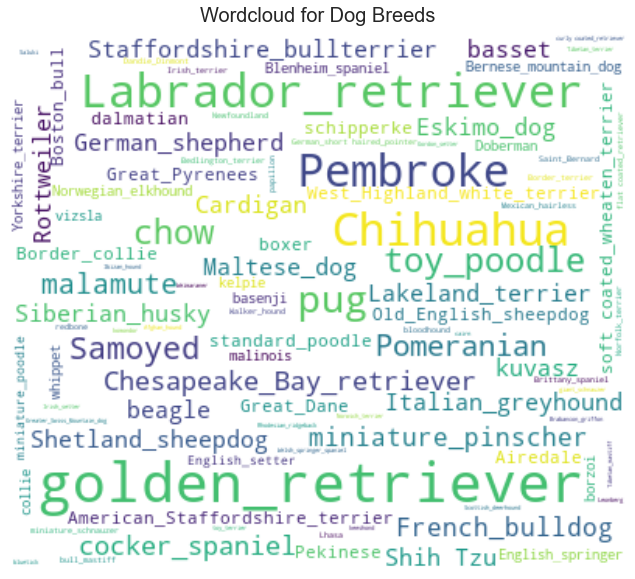

In [527]:
# Wordcloud for dog_breed visualization:
text = Twitter_archive_clean.loc[:, 'dog_breed'].str.cat(others=None, sep=' ')

# Instantiate word cloud object
wordcloud = WordCloud(background_color='white', max_words=200,  stopwords=STOPWORDS,
              width=400, height=350,contour_width=0.1, 
                      contour_color='green')

# Generate word cloud
wordcloud.generate(text)
# Show word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud for Dog Breeds', fontsize=20)
plt.axis('off')
;

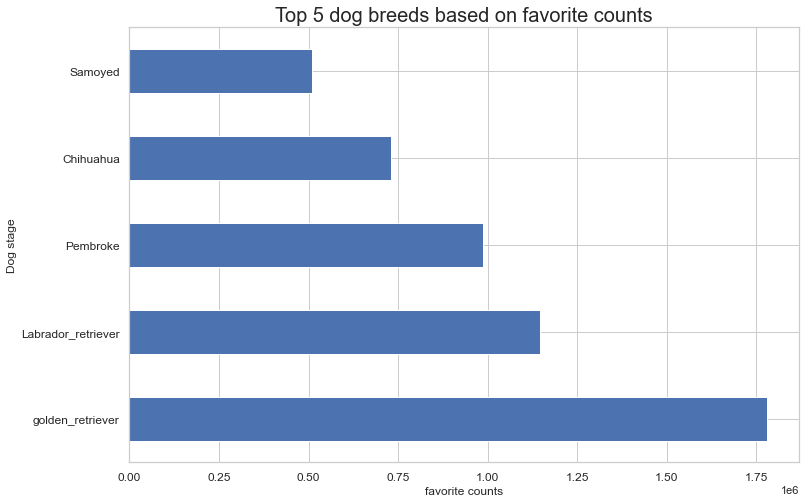

In [532]:
#plotting an horizontal bar chart to show top 5 dog breed by favorite counts
top_breed = twitter_archive.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=True).nlargest(5)
plt.figure(figsize=(12,8))
plt.title("Top 5 dog breeds based on favorite counts", size=20)
top_breed.plot(kind='barh',fontsize=12,color='b')
plt.xlabel('favorite counts', fontsize=12)
plt.ylabel('Dog stage', fontsize=12);
sns.set_style("whitegrid");

6.The top 5 favorite golden retrievers?

In [533]:
#information on the top favorite golden retrieversand their ratings
Golden_retriever= twitter_archive.query('dog_breed == "golden_retriever"')

Golden_retriever.sort_values(by='favorite_count', ascending = False,inplace=True)

Top_5=Golden_retriever[['names','tweet_id','favorite_count','stage','jpg_url','rating']].head()
Top_5

/var/folders/qx/qytfv1295sv69kxppzc23gpm0000gn/T/ipykernel_31183/3873820911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Golden_retriever.sort_values(by='favorite_count', ascending = False,inplace=True)


,names,tweet_id,favorite_count,stage,jpg_url,rating
311,Zoey,870374049280663552,85011,NaN,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,13/10
6,NaN,795464331001561088,55683,doggo,https://pbs.twimg.com/ext_tw_video_thumb/79546...,13/10
36,Barney,846514051647705089,48410,doggo,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,13/10
274,Bella,883482846933004288,46860,NaN,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,5/10
278,Alfy,882268110199369728,45880,NaN,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,13/10


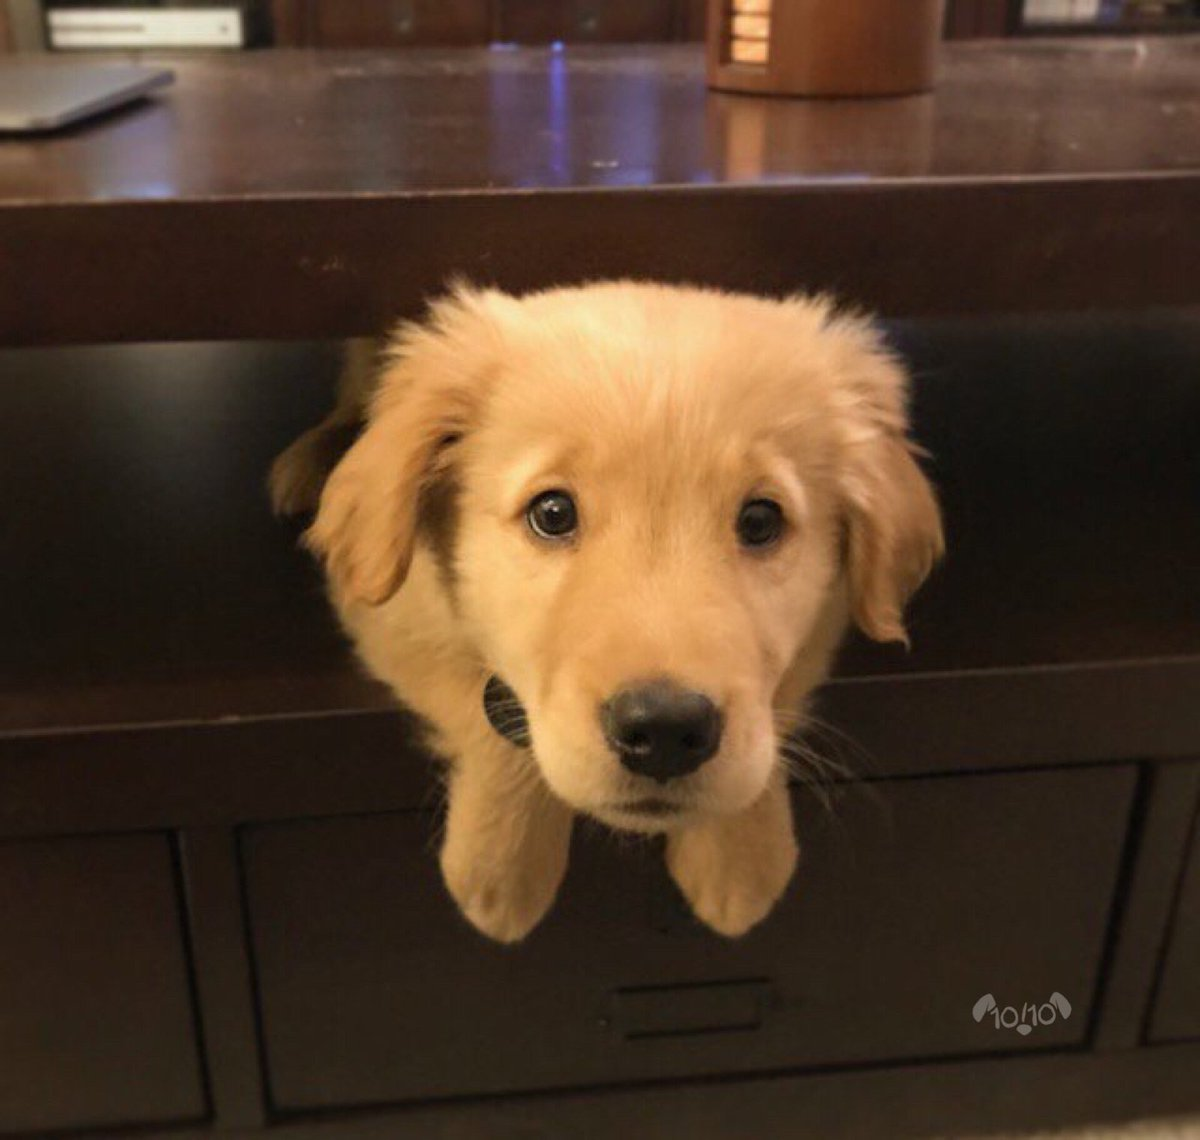

In [534]:
#loading image of the favorite no 1 golden retriever
#First one
url = Top_5.jpg_url.iloc[0]
r = requests.get(url)
Image.open(BytesIO(r.content))

### Dog stages by favorite count

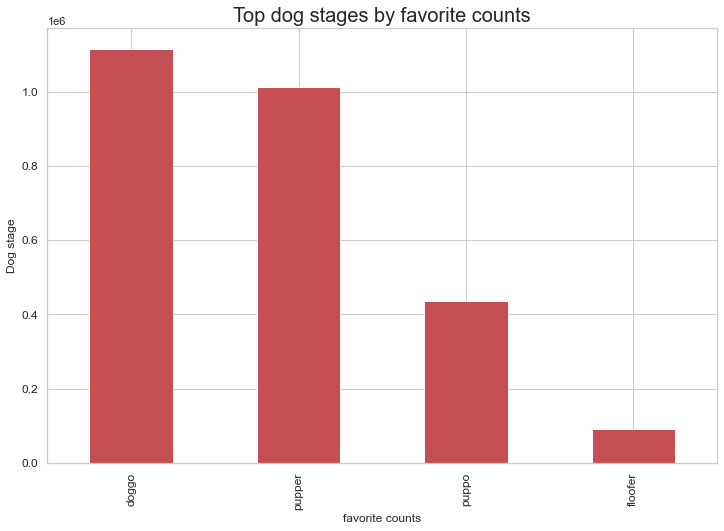

In [535]:
#plotting a bar chart to show top 5 dog breed by favorite counts
top_stage = twitter_archive.groupby('stage')['favorite_count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.title("Top dog stages by favorite counts", size=20)
top_stage.plot(kind='bar',fontsize=12,color='r')
plt.xlabel('favorite counts', fontsize=12)
plt.ylabel('Dog stage', fontsize=12);
sns.set_style("whitegrid");

### What is the correlation between retweet count and favorite count?

The Correlation Between favorite counts And retweet counts is  0.9144390055498242


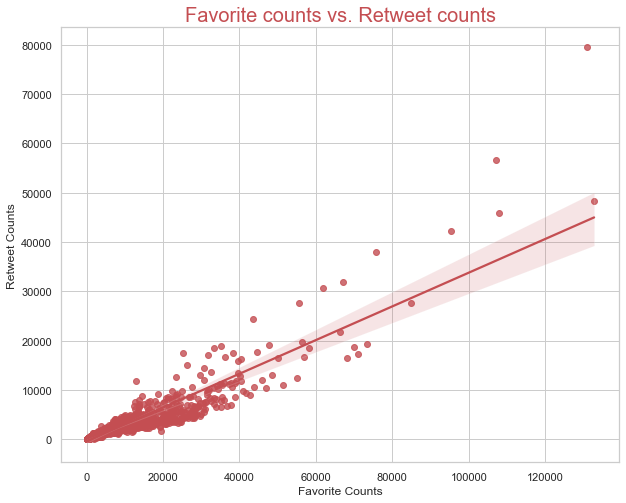

In [538]:
sns.set(rc={'figure.figsize':(10,8)}, style="whitegrid")
sns.regplot(x='favorite_count', y='retweet_count', data=twitter_archive, color="r")

plt.title("Favorite counts vs. Retweet counts",color="r", size=20)
plt.ylabel("Retweet Counts", size=12)
plt.xlabel("Favorite Counts", size=12);

data_corr = twitter_archive.corr()

print("The Correlation Between favorite counts And retweet counts is ",data_corr.loc['favorite_count','retweet_count']);

<a id='ref'></a>
# REFERENCE

- Youtube [video](https://youtu.be/_vRHGRWi9_U) to know the difference between doggo, floofer, pupper and puppo as stages of dogs

- Doggo having nightmares youtube [video](https://youtu.be/WdIfjzreRnM) to know the difference between doggo, floofer, pupper and puppo as stages of dogs